<a href="https://colab.research.google.com/github/JovanBosic/Preparation-for-TensorFlow-certificate-2/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have madified it to only use two classes (pizza 🍕 & steak 🥩) using the image data momdification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesnt work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-04-01 09:28:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.69.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   223MB/s    in 0.5s    

2022-04-01 09:28:46 (223 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
!ls pizza_steak

test  train


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr  1 09:28 .
drwxr-xr-x 1 root root 4096 Apr  1 09:28 ..
drwxr-xr-x 4 root root 4096 Apr  1 09:28 test
drwxr-xr-x 4 root root 4096 Apr  1 09:28 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, fist lets get the class names programmatically.



In [9]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}') # Show the shape of the image

  return img

['2502234.jpg']
Image shape: (512, 512, 3)


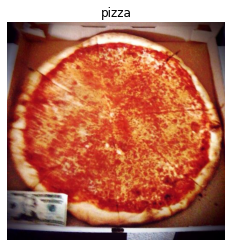

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [12]:
img

array([[[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [31, 19, 23],
        [26, 13, 20],
        [22,  9, 16]],

       [[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [30, 18, 22],
        [25, 12, 19],
        [21,  8, 15]],

       [[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [28, 16, 20],
        [23, 10, 17],
        [18,  7, 13]],

       ...,

       [[ 3,  0,  9],
        [ 3,  0,  9],
        [ 3,  0,  9],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 2,  0,  8],
        [ 2,  0,  8],
        [ 2,  0,  8],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 1,  0,  7],
        [ 1,  0,  7],
        [ 1,  0,  7],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]]], dtype=uint8)

In [13]:
img.dtype

dtype('uint8')

In [14]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixels values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [31, 19, 23],
        [26, 13, 20],
        [22,  9, 16]],

       [[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [30, 18, 22],
        [25, 12, 19],
        [21,  8, 15]],

       [[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [28, 16, 20],
        [23, 10, 17],
        [18,  7, 13]],

       ...,

       [[ 3,  0,  9],
        [ 3,  0,  9],
        [ 3,  0,  9],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 2,  0,  8],
        [ 2,  0,  8],
        [ 2,  0,  8],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 1,  0,  7],
        [ 1,  0,  7],
        [ 1,  0,  7],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]]], dtype=uint8)>

In [15]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

> 🔑**Note**: As we have discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [16]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.12156863, 0.0745098 , 0.09019608],
        [0.10196078, 0.05098039, 0.07843137],
        [0.08627451, 0.03529412, 0.0627451 ]],

       [[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.11764706, 0.07058824, 0.08627451],
        [0.09803922, 0.04705882, 0.0745098 ],
        [0.08235294, 0.03137255, 0.05882353]],

       [[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.10980392, 0.0627451 , 0.07843137],
        [0.09019608, 0.03921569, 0.06666667],
        [0.07058824, 0.02745098, 0.05098039]],

       ...,

       [[0.01176471, 0.        , 0.03529412],
        [0.01176471, 0.        , 0.03529412],
        [0.01176471, 0

## An end-to-end example

Lets build a convlutional neural network to find patterns in our images, more specifically we are need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from derectories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,# Train data contains examples and labels and fit function can recognize it
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 271ms/step - loss: 0.6246 - accuracy: 0.6460 - val_loss: 0.4667 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4377 - accuracy: 0.7960 - val_loss: 0.3998 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.4031 - accuracy: 0.8273 - val_loss: 0.3432 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 13s 274ms/step - loss: 0.3625 - accuracy: 0.8440 - val_loss: 0.3539 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3323 - accuracy: 0.8647 - val_loss: 0.3084 - val_accuracy: 0.8840


In [18]:
len(train_data)

47

In [19]:
1500/32 # Batch size

46.875

> 🔑**Note**: If the above cell is taking longer then ~10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above)

In [20]:
# Epoch 1/5  # Sa CPU
# 47/47 [==============================] - 105s 2s/step - loss: 0.5953 - accuracy: 0.6747 - val_loss: 0.3774 - val_accuracy: 0.8420

In [21]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🔨 **Practice/exercise**: Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data.

The model we are building is from the [TensorFlow playground](!https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.25747&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [22]:
train_data

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 1.8376 - accuracy: 0.5160 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [24]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...lets try to improve it.

In [25]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but lets step it up a notch )
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 1.5933 - accuracy: 0.6673 - val_loss: 1.0776 - val_accuracy: 0.5980
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.9321 - accuracy: 0.6787 - val_loss: 0.5393 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6332 - accuracy: 0.7380 - val_loss: 0.6924 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5953 - accuracy: 0.7513 - val_loss: 0.4879 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5537 - accuracy: 0.7620 - val_loss: 0.4877 - val_accuracy: 0.7660


In [26]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary Classiciation: Lets break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evavluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1621763.jpg']
Image shape: (512, 512, 3)
['1035854.jpg']
Image shape: (512, 512, 3)


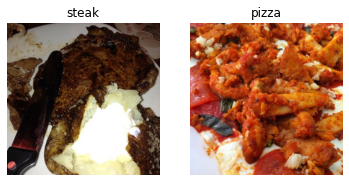

In [27]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [28]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of resons:
1. 10,000 images (or more) might not fit into memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Becouse 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896

In [29]:
!nvidia-smi

Fri Apr  1 09:31:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    65W / 149W |   1305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images hight x width
                                               class_mode='binary', # Type of data you are working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [33]:
# How many batches are there
len(train_data)

47

In [34]:
1500/32

46.875

In [35]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [36]:
images[7].shape

(224, 224, 3)

In [37]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note**: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with somethiing simple and see if it work on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [38]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [39]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
                      Conv2D(filters=10, # filter is a number of sliding windows going across an input (higher = more comlex)
                             kernel_size=3, # size of the sliding winndow going across an input
                             strides=1, # the size of the step the sliding window takes across an input
                             padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
                             activation='relu',
                             input_shape=(224, 224, 3)), # input  layers (specify input shape)
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output)
                      
])

In [40]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
# Get a summary of our model
model_4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [42]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [43]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combinaton of labels and sample data
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 270ms/step - loss: 1.6661 - accuracy: 0.6007 - val_loss: 0.5653 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.5140 - accuracy: 0.7673 - val_loss: 0.4451 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 12s 258ms/step - loss: 0.4035 - accuracy: 0.8367 - val_loss: 0.4185 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 12s 257ms/step - loss: 0.2750 - accuracy: 0.8993 - val_loss: 0.4097 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.1162 - accuracy: 0.9673 - val_loss: 0.5005 - val_accuracy: 0.7920


In [44]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.3084 - accuracy: 0.8840


[0.3083941340446472, 0.8840000033378601]

In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something, lets evaluate it.

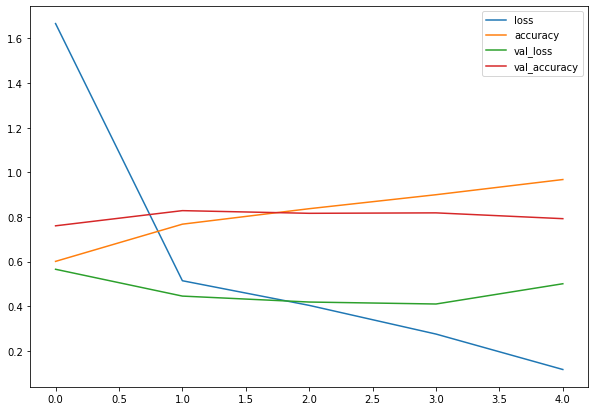

In [46]:
# Lets plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [47]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation metrics.
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many eppochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy 
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

> 🔑**Note**: When a models **validation loss starts to increase**, its likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the models ability to generalize to unseen data will be diminished.

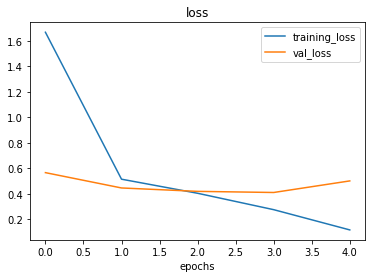

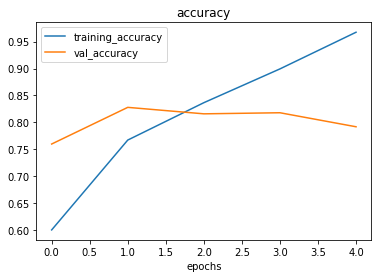

In [48]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfittitng

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another danse layer to the output or our flatten layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data..

> 🔑 **Note**: Reducing overfitting is also known as **regularization**

In [49]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [50]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [51]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 232ms/step - loss: 0.5814 - accuracy: 0.6847 - val_loss: 0.4540 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4658 - accuracy: 0.7940 - val_loss: 0.3783 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4230 - accuracy: 0.8253 - val_loss: 0.3374 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3895 - accuracy: 0.8367 - val_loss: 0.3453 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3699 - accuracy: 0.8467 - val_loss: 0.3063 - val_accuracy: 0.8780


In [52]:
# Get the summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

In [53]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


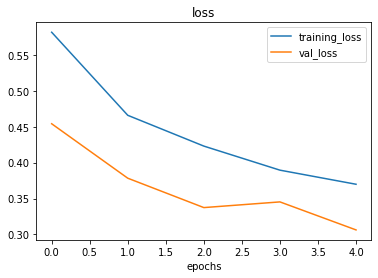

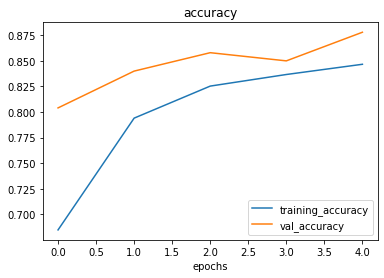

In [54]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [55]:
# Create ImageDataGenerator trining instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator withouor data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question**: What is data augmentation?

Data augmentation is the process of altering our training data, leadning it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might adjust the rotation of an image, flipping it, cropping it or something similar.

Lets write some code to visualize data augmentation.

In [56]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note**: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as the are loaded into the model.

Finally...lets visualize some augmented data!!!

In [57]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image numebr: 21


(-0.5, 223.5, 223.5, -0.5)

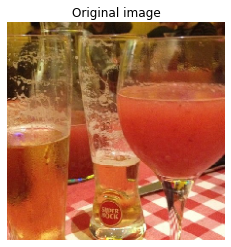

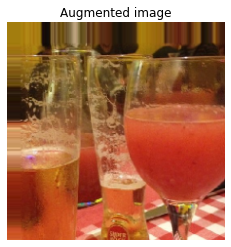

In [58]:
# Show original images and augmented image
import random
random_number = random.randint(0, 32) #our batch sizes are 32...
print(f'Showing image numebr: {random_number}')
plt.imshow(images[random_number]);
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

Now we have seen what augmented traing data looks like, lets build a model and see how it learns on augmented data.

In [59]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6979 - accuracy: 0.4867 - val_loss: 0.6813 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6880 - accuracy: 0.5727 - val_loss: 0.6447 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6902 - accuracy: 0.5767 - val_loss: 0.6162 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6887 - accuracy: 0.6007 - val_loss: 0.6329 - val_accuracy: 0.5900
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6525 - accuracy: 0.6660 - val_loss: 0.5537 - val_accuracy: 0.7400


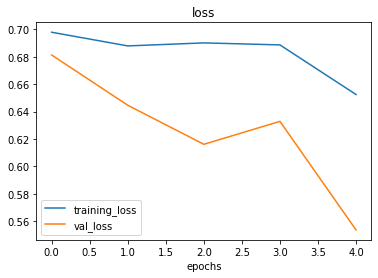

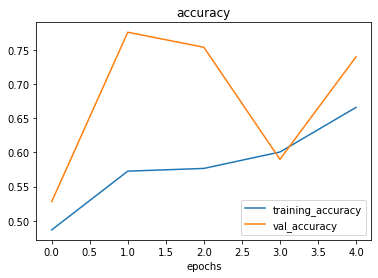

In [60]:
# Check our models training curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [61]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            shuffle=True)# shuffle data this time

Found 1500 images belonging to 2 classes.


In [62]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 557ms/step - loss: 0.6823 - accuracy: 0.5700 - val_loss: 0.6178 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6105 - accuracy: 0.6853 - val_loss: 0.6553 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 26s 557ms/step - loss: 0.5539 - accuracy: 0.7000 - val_loss: 0.3919 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5193 - accuracy: 0.7473 - val_loss: 0.3664 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 26s 549ms/step - loss: 0.5097 - accuracy: 0.7433 - val_loss: 0.4988 - val_accuracy: 0.7680


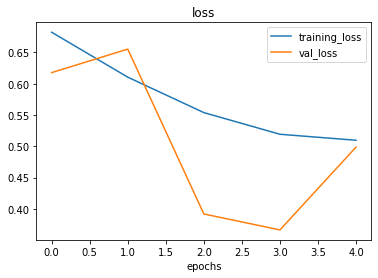

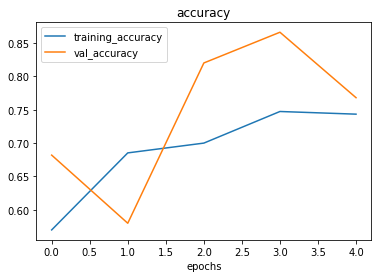

In [63]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note**: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to leanr features across a wide array of images (in our case, pizza & steak as th same time instead of just pizza then steak).

### 7. Repead until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutioonal layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* FInd an ideal learning rate
* Get more data (give the model more oppertunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own ose case

> 🔨 **Practice**: Recreate the model of the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our custom data

In [64]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


--2022-04-01 09:38:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-04-01 09:38:57 (31.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



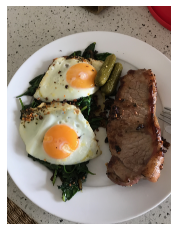

In [65]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [66]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [67]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [68]:
expanded_steak = tf.expand_dims(steak, axis=0) # dodaje se batch size

In [69]:
model_7.predict(expanded_steak)

ValueError: ignored

🔑 **Note**: When you train a neural network and you want to make a prediction with it on your own custom data, its important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [70]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image from filename, turn it into a tensor 
  and reshape it to (img_shape, img_shape, color_channels).
  '''
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [71]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')

In [72]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [74]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9390902]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldnt it be nice if we could visualize the image as well as the models prediction?

In [75]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [76]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [77]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with
  model and plots the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

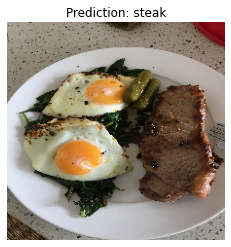

In [78]:
# Test our model on a custom imate
pred_and_plot(model_7, '03-steak.jpeg')

Our model works! Lets try it on another image...this time pizza 🍕

In [79]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-04-01 09:51:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-04-01 09:51:32 (43.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



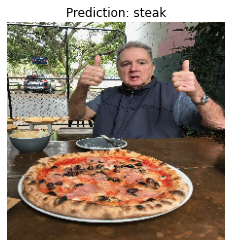

In [80]:
pred_and_plot(model_7,'03-pizza-dad.jpeg')

# Multi-class Image Classification

We have just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we are going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparamters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [81]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')

zip_ref.extractall()
zip_ref.close()



--2022-04-01 09:51:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 74.125.126.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   229MB/s    in 2.2s    

2022-04-01 09:51:36 (229 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [82]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 1

In [83]:
# Setup the train and test directory
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [84]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2484044.jpg']
Image shape: (512, 384, 3)


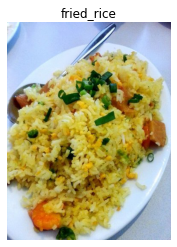

In [85]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

We have been talking a lot about CNN explainer website...how about we just take their model (also on 10 classes) and use it for our problem...?

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3)),
                      Activation(activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax') # Change to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



### 4. Fit a model

In [88]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 240ms/step - loss: 2.1650 - accuracy: 0.1933 - val_loss: 2.0516 - val_accuracy: 0.2792
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8970 - accuracy: 0.3428 - val_loss: 1.8671 - val_accuracy: 0.3500
Epoch 3/5
235/235 [==============================] - 55s 234ms/step - loss: 1.5390 - accuracy: 0.4871 - val_loss: 1.9927 - val_accuracy: 0.3052
Epoch 4/5
235/235 [==============================] - 56s 236ms/step - loss: 0.9717 - accuracy: 0.6827 - val_loss: 2.3609 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 56s 240ms/step - loss: 0.3878 - accuracy: 0.8836 - val_loss: 3.3764 - val_accuracy: 0.2808


### 5. Evaluate the model

In [89]:
# Evalaute on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 3.3764 - accuracy: 0.2808


[3.3763699531555176, 0.2808000147342682]

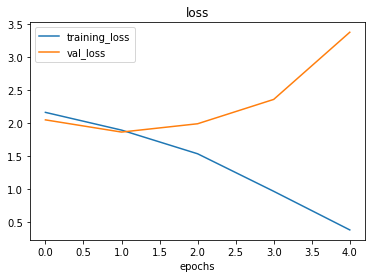

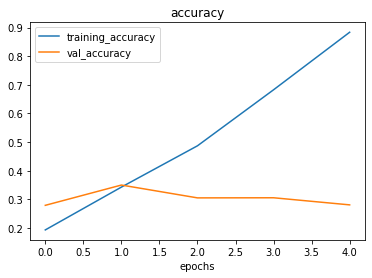

In [90]:
# Check out the models loss curves  on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, its getting great results on the training data but fails to generalize well on unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperperemeters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, its clear our model is learning something...

However, its not generalizing well to unseen data (overfitting).

So lets try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the trainng data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on simiar data to your own and allows you to use those patterns on your own dataset

In [91]:
# How about we try and simplify the model first?
# Lets try to remove 2 Conv2D layers...
model_9 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 42s 176ms/step - loss: 2.3857 - accuracy: 0.2189 - val_loss: 2.0104 - val_accuracy: 0.2763
Epoch 2/5
235/235 [==============================] - 41s 176ms/step - loss: 1.7893 - accuracy: 0.3859 - val_loss: 1.9154 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 41s 175ms/step - loss: 1.4725 - accuracy: 0.5140 - val_loss: 1.9514 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 41s 175ms/step - loss: 1.0858 - accuracy: 0.6552 - val_loss: 2.2100 - val_accuracy: 0.3257
Epoch 5/5
235/235 [==============================] - 41s 173ms/step - loss: 0.6937 - accuracy: 0.7917 - val_loss: 2.4741 - val_accuracy: 0.2961


In [92]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [93]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

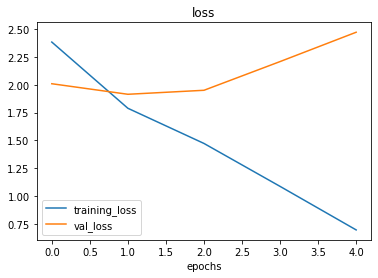

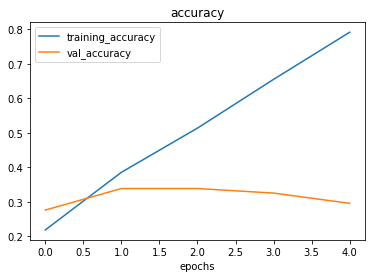

In [94]:
# Chec out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didnt work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Lets try and improve our models results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [97]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical') 

Found 7500 images belonging to 10 classes.


In [99]:
# LEts create another model but this time we will fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8) # only architecture

# Compile the model
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])




In [100]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [101]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [102]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 150s 635ms/step - loss: 2.2273 - accuracy: 0.1691 - val_loss: 2.0608 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 145s 617ms/step - loss: 2.1048 - accuracy: 0.2427 - val_loss: 1.9540 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 127s 541ms/step - loss: 2.0339 - accuracy: 0.2813 - val_loss: 1.8971 - val_accuracy: 0.3352
Epoch 4/5
235/235 [==============================] - 129s 550ms/step - loss: 1.9946 - accuracy: 0.3031 - val_loss: 1.8308 - val_accuracy: 0.3732
Epoch 5/5
235/235 [==============================] - 137s 584ms/step - loss: 1.9691 - accuracy: 0.3159 - val_loss: 1.8442 - val_accuracy: 0.3596


In [103]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 3.3764 - accuracy: 0.2808


[3.376368761062622, 0.2808000147342682]

In [104]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.8442 - accuracy: 0.3596


[1.8441740274429321, 0.3596000075340271]

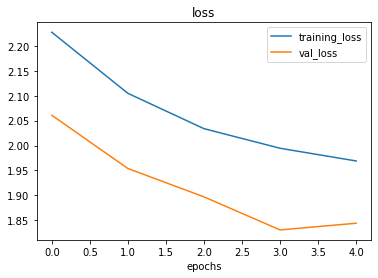

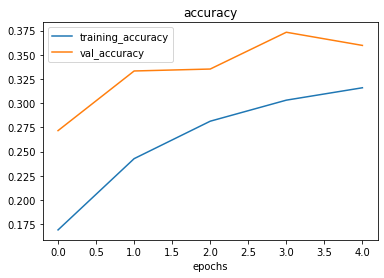

In [105]:
# Check our model trained on augmented datas loss curves
plot_loss_curves(history_10)

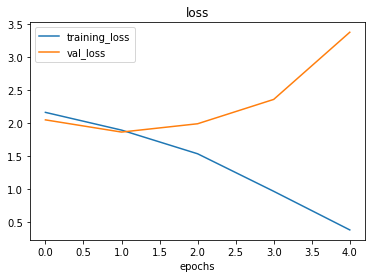

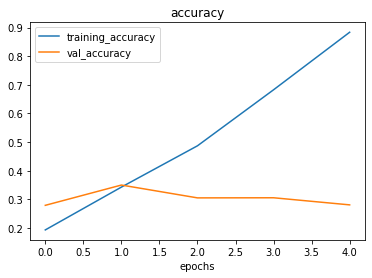

In [106]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they are heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructing our models architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Lets use our trained model to make some predictions on our own custom images!

In [108]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [109]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-04-01 10:31:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.05s   

2022-04-01 10:31:21 (30.5 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-04-01 10:31:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [112]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [144]:
# Reconfig pred_and_plot function to work with multi-class image
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with
  model and plots the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
 
  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

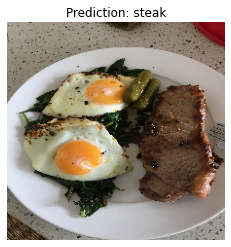

In [145]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

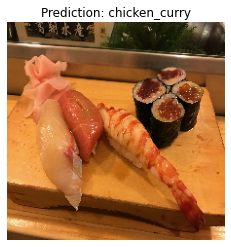

In [149]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

Looks like our model didnt perform very vell on our custom images but this is because it only achived ~36% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [150]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [151]:
# Load in a trained model and evaluate  it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 16s 202ms/step - loss: 1.8442 - accuracy: 0.3596


[1.8441730737686157, 0.3596000075340271]

In [153]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 15s 188ms/step - loss: 1.8442 - accuracy: 0.3596


[1.8441734313964844, 0.3596000075340271]